<a href="https://colab.research.google.com/github/ErnandoRizkiD/SLOSubject/blob/main/Ernando_Rizki_Dalimunthe_UAS_2101202071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive

In [63]:
cd/content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
df = pd.read_csv('data_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [66]:
#menghitung jumlah baris dan kolom pada dataset
df.shape

(569, 33)

In [67]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [68]:
df = df.dropna(axis=1)

In [69]:
df.shape

(569, 32)

In [70]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

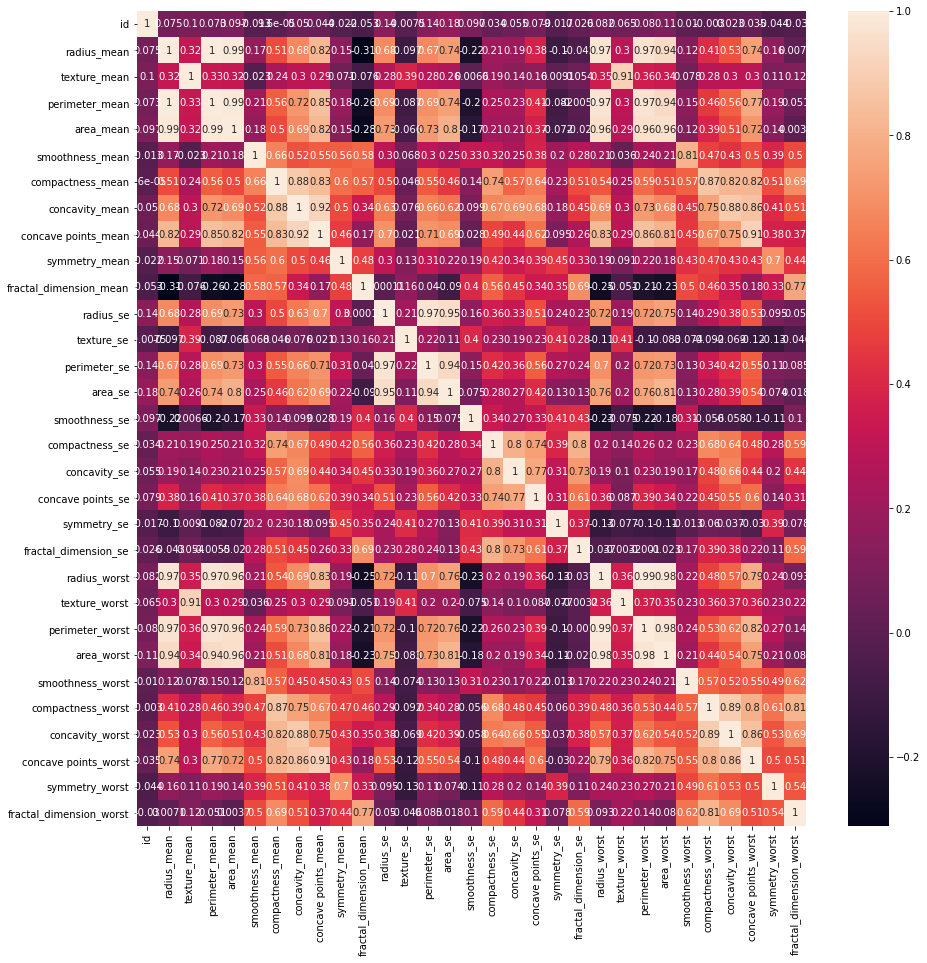

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.subplots(figsize=(15,15))
corr=df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [72]:
x=df.iloc[:, 2:31].values
y=df.iloc[:, 1].values

In [73]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [74]:
x.shape

(569, 29)

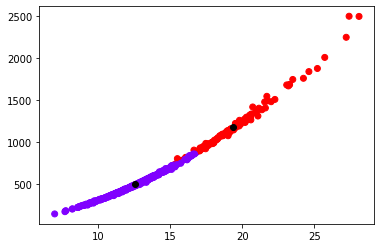

In [75]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[:,0], x[:,3], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,3], color='black')

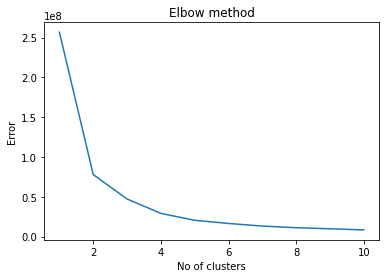

In [76]:
#Elbow method
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

**Data tanpa reduksi dimensi (x) =569, label tanpa reduksi dimensi (y) = 29**

In [77]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

**PCA**

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,8.966336,1.984413
1,2.463064,-3.856484
2,5.777253,-0.841503
3,6.283637,9.494189
4,4.077171,-1.544879


In [79]:
pd_y = pd.DataFrame(y, columns = ['target'])
pd_y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [80]:
finalDf = pd.concat([principalDf, pd_y[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,8.966336,1.984413,1
1,2.463064,-3.856484,1
2,5.777253,-0.841503,1
3,6.283637,9.494189,1
4,4.077171,-1.544879,1


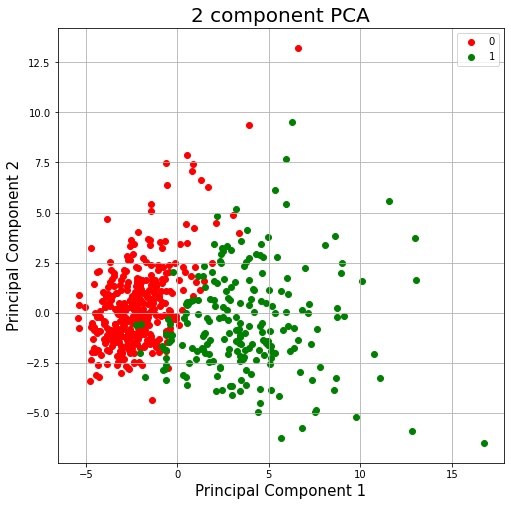

In [81]:
#Visualisasi PCA

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]  #0:'B', 1:'M'
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

**Klasifikasi dengan Neural Network**

In [82]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(y)
print(labels)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


In [83]:
from sklearn.model_selection import train_test_split
(trainx, testx, trainy, testy) = train_test_split(x,	np.array(labels), test_size=0.2)
trainx_pca,testx_pca,trainy_pca,testy_pca=train_test_split(principalDf,y,test_size=0.2)
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)
print(trainx_pca.shape)
print(testx_pca.shape)
print(trainy_pca.shape)
print(testy_pca.shape)

(455, 29)
(114, 29)
(455, 1)
(114, 1)
(455, 2)
(114, 2)
(455,)
(114,)


In [88]:
#Tanpa reduksi dimensi
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.core import Activation
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout
model1 = keras.Sequential()

input_layer = keras.layers.Dense(8,input_dim=29,activation='relu')
model1.add(input_layer)
model1.add(BatchNormalization())
model1.add(Dropout(0.25))
hidden_layer = keras.layers.Dense(3,activation='relu')
model1.add(hidden_layer)
model1.add(BatchNormalization())
model1.add(Dropout(0.25))
output_layer = keras.layers.Dense(1, activation='sigmoid')
model1.add(output_layer)
sgd  = keras.optimizers.SGD(lr=0.01)
model1.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 240       
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 8)                 32        
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 27        
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 3)                 12        
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 3)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [89]:
#klasifikasi NN tanpa PCA
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, #2 kelas --> binary_crossentropy
	metrics=["accuracy"])
H1 = model1.fit(trainx, trainy, validation_data=(testx, testy), epochs=100, batch_size=20)

[INFO] training network...
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


23/23 [==============================] - 1s 11ms/step - loss: 0.0000e+00 - accuracy: 0.6264 - val_loss: 0.0000e+00 - val_accuracy: 0.8421
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6549 - val_loss: 0.0000e+00 - val_accuracy: 0.8596
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7451 - val_loss: 0.0000e+00 - val_accuracy: 0.8772
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7516 - val_loss: 0.0000e+00 - val_accuracy: 0.9035
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8110 - val_loss: 0.0000e+00 - val_accuracy: 0.8947
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8242 - val_loss: 0.0000e+00 - val_accuracy: 0.8947
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8198 - val_loss: 0.

In [90]:
score_Tanpapca = model1.evaluate(testx, testy, verbose=0)
print('Accuracy Test Tanpa PCA: {} %'.format(score_Tanpapca[1]*100))

Accuracy Test Tanpa PCA: 96.49122953414917 %


In [93]:
#Dengan PCA
model2 = keras.Sequential()

input_layer = keras.layers.Dense(8,input_dim=2,activation='relu')
model2.add(input_layer)
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
hidden_layer = keras.layers.Dense(3,activation='relu')
model2.add(hidden_layer)
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
output_layer = keras.layers.Dense(1, activation='sigmoid')
model2.add(output_layer)


model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 24        
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 8)                 32        
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 8)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 27        
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 3)                 12        
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, 3)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [95]:
#Klasifikasi NN dengan PCA
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model2.compile(loss="binary_crossentropy", optimizer=opt, #2 kelas --> binary_crossentropy
	metrics=["accuracy"])
H2 = model2.fit(trainx_pca, trainy_pca, validation_data=(testx_pca, testy_pca), epochs=100, batch_size=20)

[INFO] training network...
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


23/23 [==============================] - 1s 9ms/step - loss: 1.2335 - accuracy: 0.3363 - val_loss: 1.1652 - val_accuracy: 0.1316
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 1.0881 - accuracy: 0.4176 - val_loss: 0.9328 - val_accuracy: 0.2456
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 1.0045 - accuracy: 0.4901 - val_loss: 0.7700 - val_accuracy: 0.4298
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8343 - accuracy: 0.5714 - val_loss: 0.6517 - val_accuracy: 0.6667
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7819 - accuracy: 0.5934 - val_loss: 0.5859 - val_accuracy: 0.7456
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.6703 - val_loss: 0.5463 - val_accuracy: 0.7807
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.6571 - val_loss: 0.5144 - val_accuracy: 0.9035
Epoch 8/100
23/23 [======

In [96]:
score_denganpca = model2.evaluate(testx_pca, testy_pca, verbose=0)
print('Accuracy Test Dengan PCA: {} %'.format(score_denganpca[1]*100))

Accuracy Test Dengan PCA: 94.73684430122375 %


**Accuracy tanpa PCA dan dengan PCA**

100


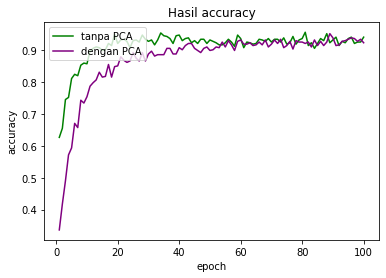

In [97]:
acc=H1.history['accuracy']
acc2=H2.history['accuracy']
print(len(H1.history['accuracy']))
import numpy as np
sbY=np.arange(1,len(H1.history['accuracy'])+1)

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(sbY, acc, color='green')
plt.plot(sbY, acc2, color='purple')
plt.title('Hasil accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['tanpa PCA', 'dengan PCA'], loc='upper left')
plt.show()

In [98]:
print('Rata-rata accuracy Test Tanpa PCA: {} %'.format(score_Tanpapca[1]*100))
print('Rata-rata accuracy Test dengan PCA: {} %'.format(score_denganpca[1]*100))

Rata-rata accuracy Test Tanpa PCA: 96.49122953414917 %
Rata-rata accuracy Test dengan PCA: 94.73684430122375 %


**Loss tanpa PCA dan Dengan PCA**

100


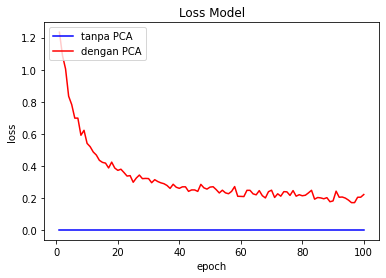

In [99]:
loss=H1.history['loss']
loss2=H2.history['loss']
print(len(H1.history['accuracy']))
import numpy as np
sbY=np.arange(1,len(H1.history['accuracy'])+1)

plt.plot(sbY, loss, color='blue')
plt.plot(sbY, loss2, color='red')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['tanpa PCA', 'dengan PCA'], loc='upper left')
plt.show()

In [100]:
print('Rata-rata loss Test Tanpa PCA: {} %'.format(score_Tanpapca[0]*100))
print('Rata-rata loss Test dengan PCA: {} %'.format(score_denganpca[0]*100))

Rata-rata loss Test Tanpa PCA: 0.0 %
Rata-rata loss Test dengan PCA: 13.305085897445679 %


**LDA**

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
df = pd.read_csv('data_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [102]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [107]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)

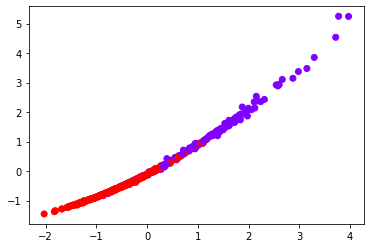

In [108]:
plt.scatter(x[:,0], x[:,3], c=y_kmeans, cmap='rainbow')

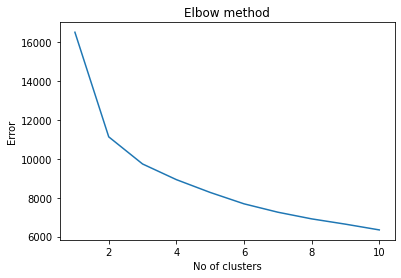

In [109]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [120]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [121]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
linearDA = lda.fit_transform(x, y)
linearDA = lda.transform(x)
linearDf = pd.DataFrame(data = linearDA
             , columns = ['linearDA 1'])
linearDf.head()

,linearDA 1
0,3.400572
1,2.075583
2,3.799135
3,3.937610
4,2.213533


In [122]:
pd_y = pd.DataFrame(y, columns = ['target'])
pd_y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [128]:
finalDf= pd.concat([linearDf, pd_y[['target']]], axis = 1)
finalDf.head()

,linearDA 1,target
0,3.400572,1
1,2.075583,1
2,3.799135,1
3,3.937610,1
4,2.213533,1


In [124]:
x.shape

(569, 29)

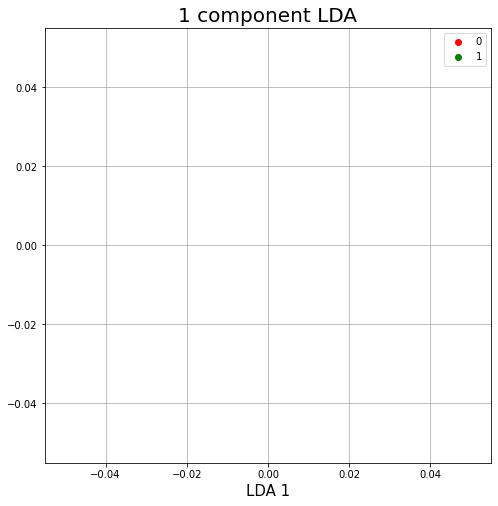

In [129]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_title('1 component LDA', fontsize = 20)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalLdDf['target'] == target
    ax.scatter(finalLdDf.loc[indicesToKeep, 'linearDA 1']
               , finalLdDf.loc[indicesToKeep, 'linearDA 1']
               , c = color)
ax.legend(targets)
ax.grid()

In [130]:
dX=finalDf[['linearDA 1']]
dy=finalDf[['target']]

In [131]:
sc = StandardScaler()
X = sc.fit_transform(dX)

In [132]:
(trainx, testx, trainy, testy) = train_test_split(x,	np.array(labels), test_size=0.2)
trainx_lda,testx_lda,trainy_lda,testy_lda=train_test_split(linearDf,y,test_size=0.2)

In [133]:
#Dengan LDA
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.core import Activation
model3 = keras.Sequential()

input_layer = keras.layers.Dense(8,input_dim=1,activation='relu')
model3.add(input_layer)
model3.add(BatchNormalization())
model3.add(Dropout(0.25))
hidden_layer = keras.layers.Dense(3,activation='relu')
model3.add(hidden_layer)
model3.add(BatchNormalization())
model3.add(Dropout(0.25))
output_layer = keras.layers.Dense(1, activation='sigmoid')
model3.add(output_layer)


model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 16        
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, 8)                 32        
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 8)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 27        
_________________________________________________________________
module_wrapper_18 (ModuleWra (None, 3)                 12        
_________________________________________________________________
module_wrapper_19 (ModuleWra (None, 3)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)               

**Klasifikasi NN dengan LDA**

In [134]:
#Klasifikasi NN dengan LDA
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model3.compile(loss="binary_crossentropy", optimizer=opt, #2 kelas --> binary_crossentropy
	metrics=["accuracy"])
H3 = model3.fit(trainx_lda, trainy_lda, validation_data=(testx_lda, testy_lda), epochs=100, batch_size=20)

[INFO] training network...
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


23/23 [==============================] - 1s 10ms/step - loss: 1.0629 - accuracy: 0.4637 - val_loss: 0.5266 - val_accuracy: 0.6579
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9402 - accuracy: 0.5253 - val_loss: 0.4676 - val_accuracy: 0.9561
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.7033 - val_loss: 0.4277 - val_accuracy: 0.9737
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.7582 - val_loss: 0.3873 - val_accuracy: 0.9737
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7890 - val_loss: 0.3421 - val_accuracy: 0.9737
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8484 - val_loss: 0.3011 - val_accuracy: 0.9737
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4066 - accuracy: 0.8593 - val_loss: 0.2690 - val_accuracy: 0.9737
Epoch 8/100
23/23 [=====

In [135]:
score_denganlda = model3.evaluate(testx_lda, testy_lda, verbose=0)
print('Accuracy Test Dengan LDA: {} %'.format(score_denganlda[1]*100))
score_Tanpalda = model1.evaluate(testx, testy, verbose=0)
print('Accuracy Test Tanpa LDA: {} %'.format(score_Tanpalda[1]*100))

Accuracy Test Dengan LDA: 99.12280440330505 %
Accuracy Test Tanpa LDA: 95.61403393745422 %


**Accuracy tanpa LDA dan dengan LDA**

100


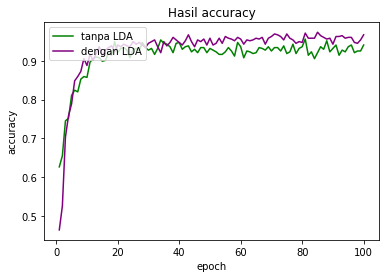

In [136]:
acc=H1.history['accuracy']
acc3=H3.history['accuracy']
print(len(H1.history['accuracy']))
import numpy as np
sbY=np.arange(1,len(H1.history['accuracy'])+1)

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(sbY, acc, color='green')
plt.plot(sbY, acc3, color='purple')
plt.title('Hasil accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['tanpa LDA', 'dengan LDA'], loc='upper left')
plt.show()

In [137]:
print('Rata-rata accuracy Test Tanpa LDA: {} %'.format(score_Tanpalda[1]*100))
print('Rata-rata accuracy Test dengan LDA: {} %'.format(score_denganlda[1]*100))

Rata-rata accuracy Test Tanpa LDA: 95.61403393745422 %
Rata-rata accuracy Test dengan LDA: 99.12280440330505 %


**Loss tanpa LDA dan dengan LDA**

100


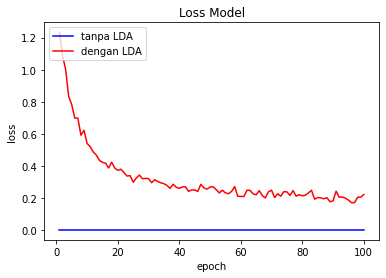

In [138]:
loss=H1.history['loss']
loss3=H3.history['loss']
print(len(H1.history['accuracy']))
import numpy as np
sbY=np.arange(1,len(H1.history['accuracy'])+1)

plt.plot(sbY, loss, color='blue')
plt.plot(sbY, loss2, color='red')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['tanpa LDA', 'dengan LDA'], loc='upper left')
plt.show()

In [139]:
print('Rata-rata loss Test Tanpa LDA: {} %'.format(score_Tanpapca[0]*100))
print('Rata-rata loss Test dengan LDA: {} %'.format(score_denganlda[0]*100))

Rata-rata loss Test Tanpa LDA: 0.0 %
Rata-rata loss Test dengan LDA: 5.466330796480179 %


**FA**

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.decomposition import FactorAnalysis as FA

In [141]:
fa = FA(n_components=2)
FaComponents = fa.fit_transform(x)
FaDf = pd.DataFrame(data = FaComponents
             , columns = ['FA component 1', 'FA component 2'])
FaDf.head()

,FA component 1,FA component 2
0,1.180364,2.832064
1,1.771567,-1.551100
2,1.578395,0.410345
3,-0.683991,4.242513
4,1.756121,-0.244201


In [142]:
pd_y = pd.DataFrame(y, columns = ['target'])
pd_y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [143]:
finalFaDf = pd.concat([FaDf, pd_y[['target']]], axis = 1)
finalFaDf.head()

,FA component 1,FA component 2,target
0,1.180364,2.832064,1
1,1.771567,-1.551100,1
2,1.578395,0.410345,1
3,-0.683991,4.242513,1
4,1.756121,-0.244201,1


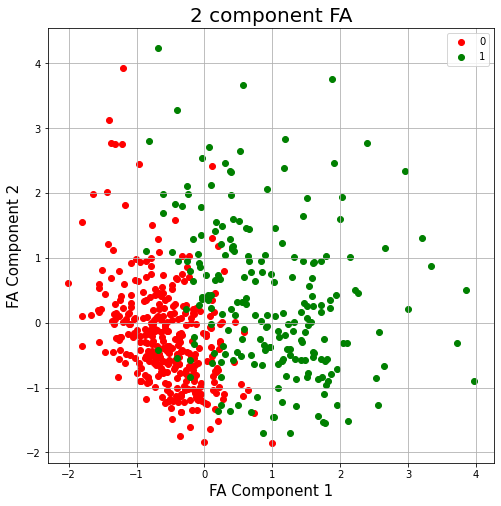

In [144]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('FA Component 1', fontsize = 15)
ax.set_ylabel('FA Component 2', fontsize = 15)
ax.set_title('2 component FA', fontsize = 20)
targets = [0, 1]  #0:'B', 1:'M'
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalFaDf['target'] == target
    ax.scatter(finalFaDf.loc[indicesToKeep, 'FA component 1']
               , finalFaDf.loc[indicesToKeep, 'FA component 2']
               , c = color)
ax.legend(targets)
ax.grid()

In [145]:
#Dengan FA
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.core import Activation
model4 = keras.Sequential()

input_layer = keras.layers.Dense(8,input_dim=2,activation='relu')
model4.add(input_layer)
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
hidden_layer = keras.layers.Dense(3,activation='relu')
model4.add(hidden_layer)
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
output_layer = keras.layers.Dense(1, activation='sigmoid')
model4.add(output_layer)


model4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 24        
_________________________________________________________________
module_wrapper_20 (ModuleWra (None, 8)                 32        
_________________________________________________________________
module_wrapper_21 (ModuleWra (None, 8)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 27        
_________________________________________________________________
module_wrapper_22 (ModuleWra (None, 3)                 12        
_________________________________________________________________
module_wrapper_23 (ModuleWra (None, 3)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)               

In [146]:
from sklearn.model_selection import train_test_split
(trainx, testx, trainy, testy) = train_test_split(x,	np.array(labels), test_size=0.2)
trainx_fa,testx_fa,trainy_fa,testy_fa=train_test_split(FaDf,y,test_size=0.2)

In [147]:
#Klasifikasi NN dengan FA
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model4.compile(loss="binary_crossentropy", optimizer=opt, #2 kelas --> binary_crossentropy
	metrics=["accuracy"])
H4 = model4.fit(trainx_fa, trainy_fa, validation_data=(testx_fa, testy_fa), epochs=100, batch_size=20)

[INFO] training network...
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


23/23 [==============================] - 1s 10ms/step - loss: 0.7061 - accuracy: 0.6110 - val_loss: 0.5771 - val_accuracy: 0.7544
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6659 - val_loss: 0.5485 - val_accuracy: 0.8070
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5744 - accuracy: 0.6879 - val_loss: 0.5250 - val_accuracy: 0.8509
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7143 - val_loss: 0.5043 - val_accuracy: 0.8509
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7231 - val_loss: 0.4844 - val_accuracy: 0.8684
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7495 - val_loss: 0.4622 - val_accuracy: 0.8684
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5012 - accuracy: 0.7626 - val_loss: 0.4407 - val_accuracy: 0.8684
Epoch 8/100
23/23 [=====

In [148]:
score_Tanpafa = model1.evaluate(testx, testy, verbose=0)
print('Accuracy Test Tanpa FA: {} %'.format(score_Tanpafa[1]*100))
score_denganfa = model4.evaluate(testx_fa, testy_fa, verbose=0)
print('Accuracy Test Dengan FA: {} %'.format(score_denganfa[1]*100))

Accuracy Test Tanpa FA: 96.49122953414917 %
Accuracy Test Dengan FA: 89.47368264198303 %


**Accuracy tanpa FA dan dengan FA**

100


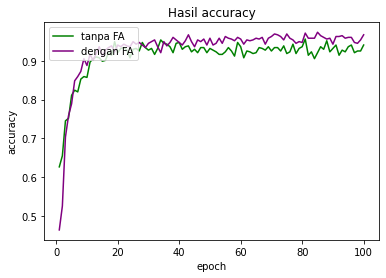

In [149]:
acc=H1.history['accuracy']
acc4=H4.history['accuracy']
print(len(H1.history['accuracy']))
import numpy as np
sbY=np.arange(1,len(H1.history['accuracy'])+1)

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(sbY, acc, color='green')
plt.plot(sbY, acc3, color='purple')
plt.title('Hasil accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['tanpa FA', 'dengan FA'], loc='upper left')
plt.show()

In [150]:
print('Rata-rata accuracy Test Tanpa FA: {} %'.format(score_Tanpafa[1]*100))
print('Rata-rata accuracy Test dengan FA: {} %'.format(score_denganfa[1]*100))

Rata-rata accuracy Test Tanpa FA: 96.49122953414917 %
Rata-rata accuracy Test dengan FA: 89.47368264198303 %


**Loss tanpa FA dan dengan FA**

100


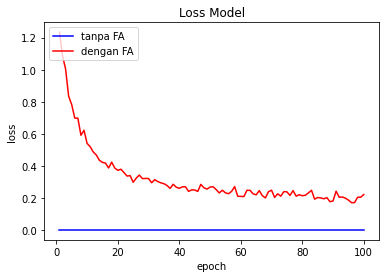

In [151]:
loss=H1.history['loss']
loss4=H4.history['loss']
print(len(H1.history['accuracy']))
import numpy as np
sbY=np.arange(1,len(H1.history['accuracy'])+1)

plt.plot(sbY, loss, color='blue')
plt.plot(sbY, loss2, color='red')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['tanpa FA', 'dengan FA'], loc='upper left')
plt.show()

In [152]:
print('Rata-rata loss Test Tanpa FA: {} %'.format(score_Tanpafa[0]*100))
print('Rata-rata loss Test dengan FA: {} %'.format(score_denganlda[0]*100))

Rata-rata loss Test Tanpa FA: 0.0 %
Rata-rata loss Test dengan FA: 5.466330796480179 %
